IMDB Reviews Dataset in TF: https://www.tensorflow.org/datasets/catalog/imdb_reviews

Coursera link: https://www.coursera.org/learn/natural-language-processing-tensorflow/lecture/piQXt/notebook-for-lesson-3

Subword Tokenizer in TF: https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder

Keras Text Preprocessing: https://keras.io/preprocessing/text/

The same in TF library: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

Custom Callback: https://www.tensorflow.org/guide/keras/custom_callback

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)



TensorFlow 2.x selected.
2.2.0-rc1


# Importing the dataset from TF:

In [0]:
# Import TF dataset

# if we have to download the TF datasets:
# !pip install -q tensorflow-datasets

import tensorflow_datasets as tfds

# Load imdb review ds available in tf:
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKOQ1KQ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKOQ1KQ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKOQ1KQ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
# Splitting into Train and Test data:

train_data, test_data = imdb['train'], imdb['test']

print(train_data)  # data is stored in a tensor of two columns: col 1 are the texts and col 2 the labels!
print(test_data)

<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>
<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>


# Subwords Tokenizer 

Learn all about subwords text encoder:
https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder


In [0]:
# Access the subwords tokenizer with this code:
tokenizer = info.features['text'].encoder   # this creates the tokenizer vocabulary
                                            # Note that this is case and punctuation sensitive
# Learn all about subwords text encoder:
# https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder

print(tokenizer.subwords)  # tokens or vocabulary

print(tokenizer.vocab_size)  # size of the vocabulary


['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [0]:
# How to encode and decode strings:

sample_string = 'TensorFlow, from basics to mastery.'

tokenized_string = tokenizer.encode(sample_string)  # encoded string
print('Tokenized string is: %s' %tokenized_string)

decoded_string = tokenizer.decode(tokenized_string)  # decoded string
print('The original string is: %s' %decoded_string)



# Visualise the Tokens to word map for that string:

for ts in tokenized_string :
  print('%s ---> %s' %(ts, tokenizer.decode([ts])))

Tokenized string is: [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050, 7975]
The original string is: TensorFlow, from basics to mastery.
6307 ---> Ten
2327 ---> sor
4043 ---> Fl
2120 ---> ow
2 ---> , 
48 ---> from 
4249 ---> basi
4429 ---> cs 
7 ---> to 
2652 ---> master
8050 ---> y
7975 ---> .


## This is Not required in this TF dataset!
## Convert the tensor data to lists of data and array of labels, readable in keras



In [0]:
# import numpy as np 

# # The datasets in TF are stored in tensors. 
# # Thus, we have to convert them to list of strings:
# training_sentences = []
# training_labels = []

# testing_sentences = []
# testing_labels = []

# # The .numpy() method explicitly converts a Tensor to a numpy array
# for s,l in train_data :  # s picks up the first col of the tensor, l picks up the second
#   training_sentences.append(str(s.numpy()))  # s is a tensor column -> it needs to be converted to array using numpy -> and then convert to a string using str -> and we add it to the list uisng append
#   training_labels.append(l.numpy())  # labels can stay as array of integers, no need to convert to str.

# for s,l in test_data :  # s picks up the first col of the tensor, l picks up the second
#   testing_sentences.append(str(s.numpy()))  # s is a tensor column -> it needs to be converted to array using numpy -> and then convert to a string using str -> and we add it to the list uisng append
#   testing_labels.append(l.numpy())  # labels can stay as array of integers, no need to convert to str.
 
# # the NN model needs a numpy array as labels, thus we convert the list of labels into np array (using np.array()):
# training_labels_final = np.array(training_labels)
# testing_labels_final = np.array(testing_labels)


# print(training_sentences[0])
# print(len(training_sentences))

# print(training_labels_final[0])
# print(len(training_labels_final))

# print(testing_sentences[0])
# print(len(testing_sentences))

# print(testing_labels_final[0])
# print(len(testing_labels_final))

[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975]
25000
0
25000
[ 173   29  185   13  115 1956 8044    3  398 1261 5497  423    2   15
   18 4096 3958  637 2657  552 2893 4926 2314 1673 4587  137   23 4872
 5345    2 7996 

## Padding the TF dataset:

Data is already tokenized above.

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data = train_data.shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_data))
test_data = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

# NN with Embedding

In [0]:
embedding_dim = 64

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),  # input_length is not needed
                             tf.keras.layers.GlobalAveragePooling1D(),  # in this case, the Flatten would make it to crash
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')  # it's a binary classification problem
])

model.summary()


from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Training the NN:

import numpy as np 

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    targ = 0.99
    if (logs['accuracy']>targ) :
    # if logs.get('accuracy').astype(float)>targ :
    # if np.less(targ, logs.get('accuracy')) :
      print('Reached %0.1f%% training accuracy. Training converged and stopping!' %(targ*100))
      self.model.stop_training = True

callback=myCallback()


history = model.fit(train_data, epochs=10, validation_data=test_data)  # , verbose=2)  # , callbacks=[callback])
# history = model.fit(tokenizer.encode(training_sentences), training_labels_final, epochs=10, callbacks=[callback], validation_data=(tokenizer.encode(testing_sentences), testing_labels_final), verbose=2)

Epoch 1/10
391/391 [==============================] - 11s 28ms/step - loss: 0.6751 - accuracy: 0.6159 - val_loss: 0.6283 - val_accuracy: 0.7094
Epoch 2/10
391/391 [==============================] - 11s 28ms/step - loss: 0.5218 - accuracy: 0.8004 - val_loss: 0.4498 - val_accuracy: 0.8271
Epoch 3/10
391/391 [==============================] - 11s 28ms/step - loss: 0.3712 - accuracy: 0.8689 - val_loss: 0.3614 - val_accuracy: 0.8666
Epoch 4/10
391/391 [==============================] - 11s 27ms/step - loss: 0.2990 - accuracy: 0.8945 - val_loss: 0.3306 - val_accuracy: 0.8704
Epoch 5/10
391/391 [==============================] - 11s 27ms/step - loss: 0.2603 - accuracy: 0.9064 - val_loss: 0.3137 - val_accuracy: 0.8784
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2336 - accuracy: 0.9165 - val_loss: 0.3063 - val_accuracy: 0.8803
Epoch 7/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2134 - accuracy: 0.9239 - val_loss: 0.3040 - val_accuracy:

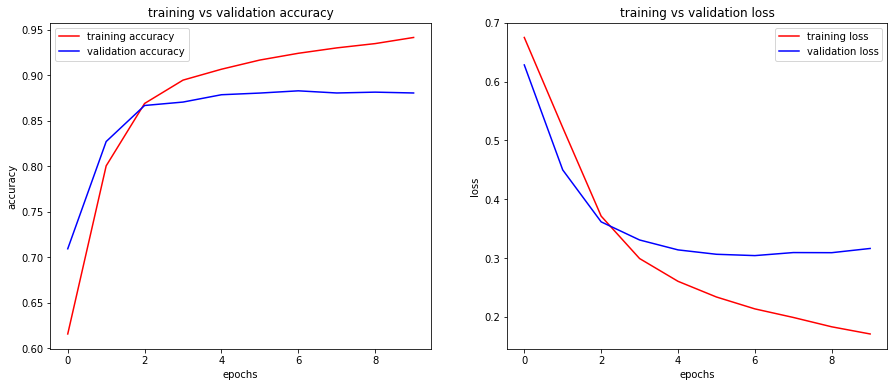

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(acc, 'r', label='training accuracy')
plt.plot(val_acc, 'b', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('training vs validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, 'r', label='training loss')
plt.plot(val_loss, 'b', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training vs validation loss')
plt.legend()

plt.show()